In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/historical_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [3]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


## Feature Creation

In [4]:
# Convert columns to datetime so that they adhere to requirements

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [5]:
# Create the target variable column: Total delivery time. 
from datetime import datetime

df['total_delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [6]:
# Fill NaN values in "store_primary_category" with the most common cuisine by associated store type. Use alphabetical order to resolve ties. 

store_id_unique = df['store_id'].unique().tolist()
store_id_cuisine_dict = {store_id: df[df['store_id'] == store_id].store_primary_category.mode()
                         for store_id in store_id_unique}

In [7]:
def fill(store_id):
    """Return primary store category from the dictionary"""
    try:
        return store_id_cuisine_dict[store_id].values[0]
    except:
        return np.nan

# fill null values
df["nan_free_store_primary_category"] = df.store_id.apply(fill)

In [8]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_delivery_time,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,indian


## What are we computing?

Our goal is to estimate the total delivery time. To do this, we can use "estimated_order_place_duration" and "estimated_store_to_consumer_driving_duration". The existence of these columns means that we can minimize our errors by predicting "estimated_prep_time". The sum of all three values will give us the approximate delivery time in seconds. 

We can use other values such as available dashers, busy dashers and outstanding orders to create a market congestion feature, which affects the total prep time. We can also create another feature to take into account the ratio of distinct items, with the logic that more distinct items will increase overall prep time. 

In [9]:
# Compute a market congestion feature by taking into account the available dashers and the outstanding orders in a 10 mile radius.
# Aim of market_congestion is to reflect effective order density. 

df['available_dashers'] = df['total_onshift_dashers'] - df['total_busy_dashers']
df['available_dashers'] = df['available_dashers'].apply(lambda x: max(x, 1))  # Avoid div by 0

df['market_congestion'] = df['total_outstanding_orders'] / df['available_dashers']

In [10]:
# Compute target variable

df['estimated_prep_time'] = df['total_delivery_time'] - df['estimated_order_place_duration'] - df['estimated_store_to_consumer_driving_duration']

# Remove NaN and outlier values from target variable
df = df.dropna(subset=['estimated_prep_time'])

# Use IQR to remove outliers on either side
Q1 = df['estimated_prep_time'].quantile(0.25)
Q3 = df['estimated_prep_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows
df = df[(df['estimated_prep_time'] >= lower_bound) & (df['estimated_prep_time'] <= upper_bound)]

In [11]:
df['estimated_prep_time'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

count    190308.000000
mean       1886.157455
std         843.015200
min        -514.000000
1%          421.000000
5%          709.000000
25%        1254.000000
50%        1764.000000
75%        2407.000000
95%        3513.000000
99%        4100.000000
max        4335.000000
Name: estimated_prep_time, dtype: float64

In [12]:
df['created_hour'] = pd.to_datetime(df['created_at']).dt.hour

# Custom buckets based on restaurant hours
def time_bucket(hour):
    if 6 <= hour < 11:
        return 'breakfast'
    elif 11 <= hour < 15:
        return 'lunch'
    elif 15 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 22:
        return 'dinner'
    else:
        return 'late_night'

df['time_bucket'] = df['created_hour'].apply(time_bucket)

df['created_day_of_week'] = pd.to_datetime(df['created_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['created_day_of_week'].isin([5, 6]).astype(int)


In [13]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_delivery_time',
       'nan_free_store_primary_category', 'available_dashers',
       'market_congestion', 'estimated_prep_time', 'created_hour',
       'time_bucket', 'created_day_of_week', 'is_weekend'],
      dtype='object')

In [14]:
# Remove extra columns to reduce clutter

cleaned_df = df.drop(columns=['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'subtotal',
                              'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
                              'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'total_delivery_time','available_dashers',
                              'created_hour', 'created_day_of_week'])

In [15]:
cleaned_df.head()

,total_items,nan_free_store_primary_category,market_congestion,estimated_prep_time,time_bucket,is_weekend
0,4,american,1.105263,2472.0,late_night,0
1,1,indian,2.000000,2888.0,dinner,0
2,1,indian,0.000000,645.0,dinner,0
3,6,indian,2.000000,2340.0,dinner,0
4,3,indian,9.000000,1294.0,late_night,1


In [16]:
# Check number of unique categories we are dealing with. 

cleaned_df['nan_free_store_primary_category'].nunique()

74

Curse of dimensionality can easily skew results by overfitting data, avoid OHE for that same reason for store categories. Instead, we can compare the results of target encoding and feature encoding to see which better suits our data model

In [17]:
cleaned_df.rename(columns={"nan_free_store_primary_category" : "store_primary_category"}, inplace=True)

In [18]:
# Feature Encoding -->
# 1. Group rare categories
category_counts = cleaned_df['store_primary_category'].value_counts()
rare_cats = category_counts[category_counts < 100].index
cleaned_df['store_primary_category_grouped'] = cleaned_df['store_primary_category'].replace(rare_cats, 'other')

# 2. Frequency encode
freq_enc = cleaned_df['store_primary_category_grouped'].value_counts(normalize=True)
cleaned_df['store_primary_category_freq'] = cleaned_df['store_primary_category_grouped'].map(freq_enc)

In [19]:
# Target Encoding -->

from sklearn.model_selection import KFold

cleaned_df['store_primary_category_target_enc'] = 0
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(cleaned_df):
    train, val = cleaned_df.iloc[train_idx], cleaned_df.iloc[val_idx]
    target_mean = train.groupby('store_primary_category')['estimated_prep_time'].mean()
    cleaned_df.loc[cleaned_df.index[val_idx], 'store_primary_category_target_enc'] = \
        cleaned_df.loc[cleaned_df.index[val_idx], 'store_primary_category'].map(target_mean)
        
# Fill any na values observed with global mean
global_mean = cleaned_df['estimated_prep_time'].mean()
cleaned_df.fillna({'store_primary_category_target_enc': global_mean}, inplace=True)

C:\Users\anish\AppData\Local\Temp\ipykernel_52640\417957880.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1857.67514361 1974.13103328 1974.13103328 ... 1747.90592094 1747.90592094
 1747.90592094]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned_df.loc[cleaned_df.index[val_idx], 'store_primary_category_target_enc'] = \


In [20]:
cleaned_df.head()

,total_items,store_primary_category,market_congestion,estimated_prep_time,time_bucket,is_weekend,store_primary_category_grouped,store_primary_category_freq,store_primary_category_target_enc
0,4,american,1.105263,2472.0,late_night,0,american,0.102180,1857.675144
1,1,indian,2.000000,2888.0,dinner,0,indian,0.037858,1985.479839
2,1,indian,0.000000,645.0,dinner,0,indian,0.037858,1985.479839
3,6,indian,2.000000,2340.0,dinner,0,indian,0.037858,1978.899896
4,3,indian,9.000000,1294.0,late_night,1,indian,0.037858,1987.636236


In [21]:
# Time Bucket OHE
time_bucket_dummies = pd.get_dummies(cleaned_df.time_bucket)
time_bucket_dummies = time_bucket_dummies.add_prefix('time_')

cleaned_df = pd.concat([cleaned_df, time_bucket_dummies], axis = 1)

In [22]:
cleaned_df.head()

,total_items,store_primary_category,market_congestion,estimated_prep_time,time_bucket,is_weekend,store_primary_category_grouped,store_primary_category_freq,store_primary_category_target_enc,time_afternoon,time_breakfast,time_dinner,time_late_night,time_lunch
0,4,american,1.105263,2472.0,late_night,0,american,0.102180,1857.675144,False,False,False,True,False
1,1,indian,2.000000,2888.0,dinner,0,indian,0.037858,1985.479839,False,False,True,False,False
2,1,indian,0.000000,645.0,dinner,0,indian,0.037858,1985.479839,False,False,True,False,False
3,6,indian,2.000000,2340.0,dinner,0,indian,0.037858,1978.899896,False,False,True,False,False
4,3,indian,9.000000,1294.0,late_night,1,indian,0.037858,1987.636236,False,False,False,True,False


In [23]:
cleaned_df.drop(columns=['store_primary_category_grouped', "store_primary_category", 'time_bucket'], inplace=True)

In [24]:
cleaned_df.head()

,total_items,market_congestion,estimated_prep_time,is_weekend,store_primary_category_freq,store_primary_category_target_enc,time_afternoon,time_breakfast,time_dinner,time_late_night,time_lunch
0,4,1.105263,2472.0,0,0.102180,1857.675144,False,False,False,True,False
1,1,2.000000,2888.0,0,0.037858,1985.479839,False,False,True,False,False
2,1,0.000000,645.0,0,0.037858,1985.479839,False,False,True,False,False
3,6,2.000000,2340.0,0,0.037858,1978.899896,False,False,True,False,False
4,3,9.000000,1294.0,1,0.037858,1987.636236,False,False,False,True,False


In [25]:
cleaned_df.dropna(inplace=True)

In [26]:
cleaned_df.isnull().sum()

total_items                          0
market_congestion                    0
estimated_prep_time                  0
is_weekend                           0
store_primary_category_freq          0
store_primary_category_target_enc    0
time_afternoon                       0
time_breakfast                       0
time_dinner                          0
time_late_night                      0
time_lunch                           0
dtype: int64

## Remove Redundancy and Collinearity

Large datasets might cause collinearity, remove redundancy to ensure better performance


In [27]:
cleaned_df.shape

(173972, 11)

<Axes: >

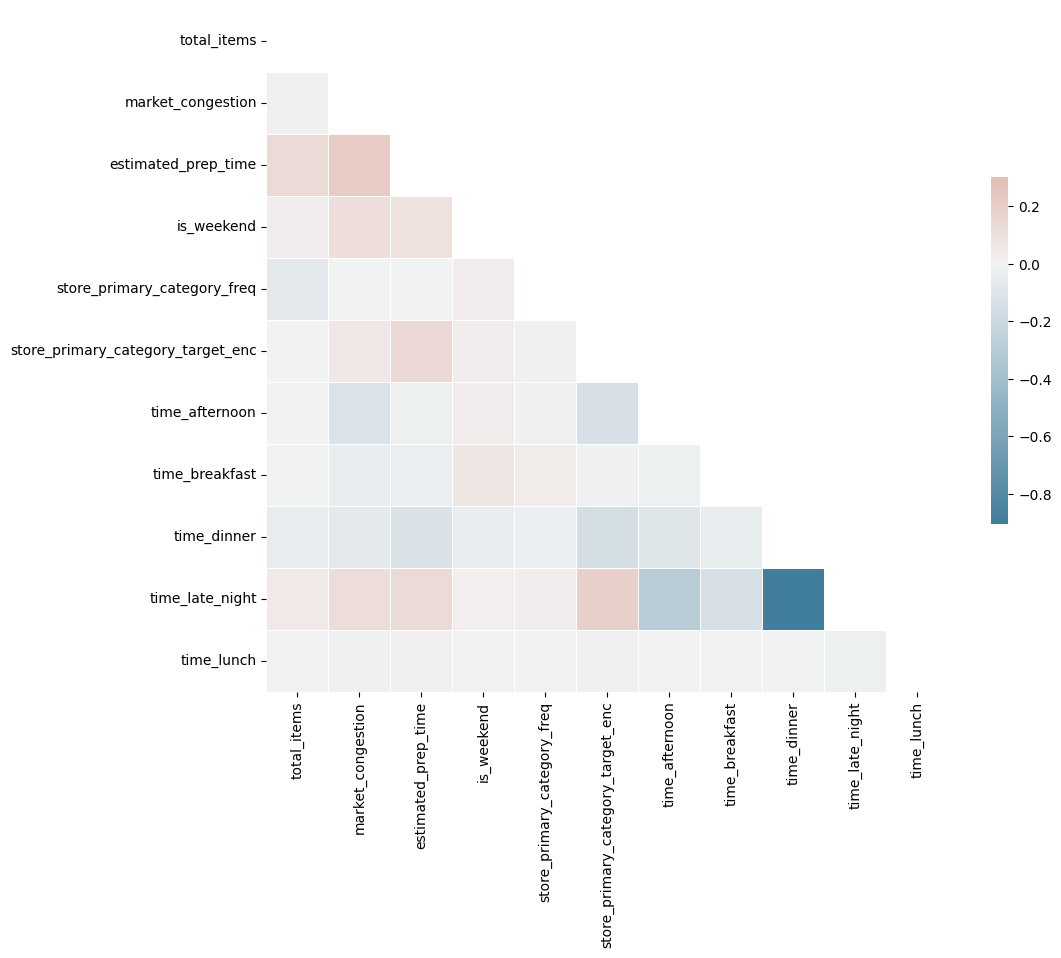

In [28]:
corr = cleaned_df.corr()

# Use a mask to hide the repeated pattern on the upper side. 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
corr_matrix = cleaned_df.corr()
np.fill_diagonal(corr_matrix.values, 0)

# Find the column each column is most correlated with
most_correlated = corr_matrix.idxmax()
correlation_values = corr_matrix.max()

# Create result table
correlation_table = pd.DataFrame({
    'Column': corr_matrix.columns,
    'Most Correlated Column': most_correlated,
    'Correlation': correlation_values
}).sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Display top N results if you like
print(correlation_table.head(10))

                              Column             Most Correlated Column  \
0                  market_congestion                estimated_prep_time   
1                estimated_prep_time                  market_congestion   
2  store_primary_category_target_enc                    time_late_night   
3                    time_late_night  store_primary_category_target_enc   
4                        total_items                estimated_prep_time   
5                         is_weekend                  market_congestion   
6                     time_breakfast                         is_weekend   
7        store_primary_category_freq                     time_breakfast   
8                     time_afternoon                         is_weekend   
9                         time_lunch                estimated_prep_time   

   Correlation  
0     0.221030  
1     0.221030  
2     0.191061  
3     0.191061  
4     0.133946  
5     0.102912  
6     0.073939  
7     0.033196  
8     0.029166  
9   

## Remove Multicollinearity

In [30]:
# VIF is used to calculate multicollinearity of a dataframe. We remove any columns that have a VIF Score of above 20 (threshold)
# Technically we should remove a column, recalculate the VIF to check if there are more columns to be removed. Not necessary for our case

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = cleaned_df.select_dtypes(include=[np.number]).dropna()
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by="VIF", ascending=False))

                             feature       VIF
5  store_primary_category_target_enc  9.984364
2                estimated_prep_time  6.585156
4        store_primary_category_freq  3.534458
0                        total_items  2.486495
1                  market_congestion  1.734478
3                         is_weekend  1.554120


As seen here, target encoding has highest VIF value. For testing we can try using both feature columns to see which gives us a better result

In [32]:
cleaned_df.drop(columns=['store_primary_category_target_enc'], inplace=True)

## Classical Machine Learning

Use multiple methods such as Random Forest, Decision Trees and different Regressors to analyse performance

In [33]:
ml_df = cleaned_df.copy()

ml_df.head()

,total_items,market_congestion,estimated_prep_time,is_weekend,store_primary_category_freq,time_afternoon,time_breakfast,time_dinner,time_late_night,time_lunch
0,4,1.105263,2472.0,0,0.102180,False,False,False,True,False
1,1,2.000000,2888.0,0,0.037858,False,False,True,False,False
2,1,0.000000,645.0,0,0.037858,False,False,True,False,False
3,6,2.000000,2340.0,0,0.037858,False,False,True,False,False
4,3,9.000000,1294.0,1,0.037858,False,False,False,True,False


We will first try using target encoding to train models

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = ml_df.drop(columns=['estimated_prep_time'])
y = ml_df['estimated_prep_time']

numeric_features = X.select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

In [36]:
# Scale only numeric values for models that need scaling, else skip
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Create a dictionary with all models for easy looping

models = {
    'LinearRegression': Pipeline([
        ('preprocess', ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features)
        ])),
        ('model', LinearRegression())
    ]),
    
    'SVR': Pipeline([
        ('preprocess', ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features)
        ])),
        ('model', SVR())
    ]),
    
    'RandomForest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ]),

    'DecisionTree': Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))
    ]),

    'XGBoost': Pipeline([
        ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
    ]),

    'LightGBM': Pipeline([
        ('model', lgb.LGBMRegressor(random_state=42))
    ])  
}


In [48]:
results = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'RMSE': rmse, 'R2 Score': r2})

# Display results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 138032, number of used features: 8
[LightGBM] [Info] Start training from score 1867.499768
              Model        RMSE  R2 Score
5          LightGBM  762.376291  0.133789
4           XGBoost  764.523653  0.128903
1               SVR  794.844970  0.058436
0  LinearRegression  796.522598  0.054458
2      RandomForest  843.963719 -0.061530
3      DecisionTree  991.464586 -0.465006


In [55]:
# Edit dictionary to add bagging model

models = {
    
    'XGBoost': Pipeline([
        ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
    ]),

    'LightGBM': Pipeline([
        ('model', lgb.LGBMRegressor(random_state=42))
    ]),
    
    # NEW Bagging model
    'Bagging_DT': Pipeline([
        ('model', BaggingRegressor(
            estimator=lgb.LGBMRegressor(random_state=42),
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ])
    
}

In [56]:
results = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'RMSE': rmse, 'R2 Score': r2})

# Display results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 138032, number of used features: 8
[LightGBM] [Info] Start training from score 1867.499768
        Model        RMSE  R2 Score
1    LightGBM  762.376291  0.133789
2  Bagging_DT  762.478925  0.133556
0     XGBoost  764.523653  0.128903


We'll now perform GridSearchCV for some of the best performing models 

In [58]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.05, 0.1]
    },

    'LightGBM': {
        'model__n_estimators': [100, 200],
        'model__num_leaves': [31, 64],
        'model__learning_rate': [0.05, 0.1]
    },

    'Bagging_DT': {
        'model__n_estimators': [50, 100],
        'model__max_samples': [0.8, 1.0],
        'model__max_features': [0.8, 1.0]
    }
}

In [59]:
cv_results = []

# Perform Grid Search CV for each model
for name, pipeline in models.items():
    print(f"\nTuning {name}...")

    param_grid = param_grids.get(name, {})
    
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    cv_results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'RMSE': rmse,
        'R2 Score': r2
    })

# Show results
cv_results_df = pd.DataFrame(cv_results).sort_values(by='RMSE')
print(cv_results_df)


Tuning XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Tuning LightGBM...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 138032, number of used features: 8
[LightGBM] [Info] Start training from score 1867.499768

Tuning Bagging_DT...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
        Model                                        Best Params        RMSE  \
1    LightGBM  {'model__learning_rate': 0.1, 'model__n_estima...  762.019672   
2  Bagging_DT  {'model__max_features': 1.0, 'model__max_sampl...  762.478925   
0     XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...  763.063333   

   R2 Score  
1  0.134599  
2 

Grid Search CV for the best models also did not massively improve the performance.

In [60]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 5))
    plt.title(title)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        shuffle=True,
        random_state=42
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training RMSE')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation RMSE')
    
    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


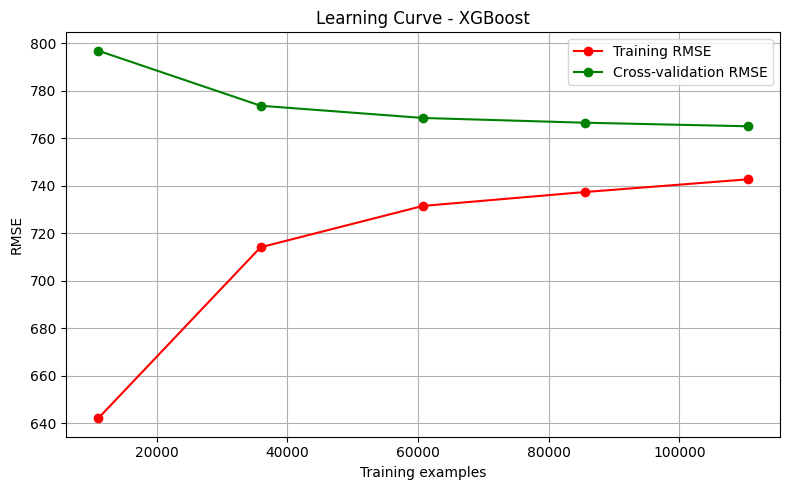

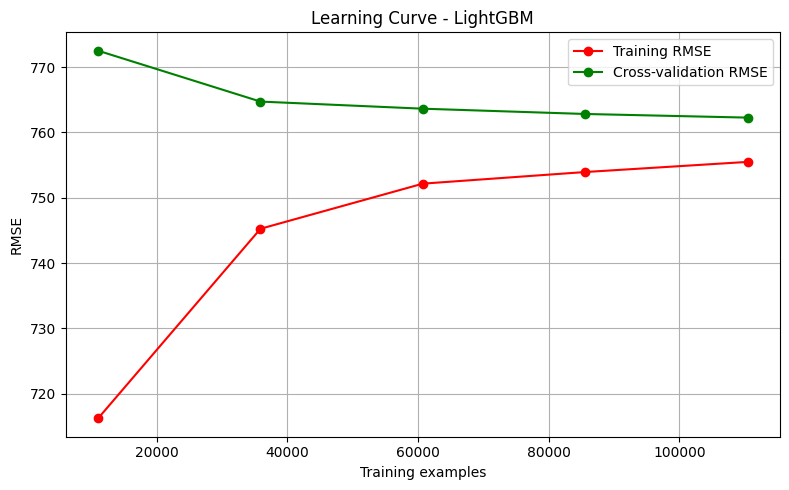

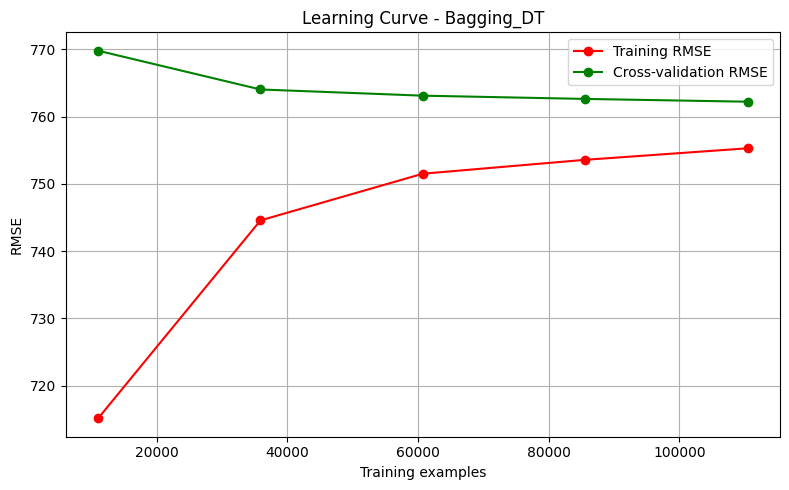

In [61]:
best_models_to_plot = ['XGBoost', 'LightGBM', 'Bagging_DT'] 

for model_name in best_models_to_plot:
    best_pipeline = models[model_name]
    plot_learning_curve(best_pipeline, f"Learning Curve - {model_name}", X_train, y_train)


To check if we can imporve performance, we can try Ensemble Stacking with LightGBM and XGBoost models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  

base_learners = [
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42))
]
meta_learner = Ridge(alpha=1.0)

stacked_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,
    n_jobs=-1
)

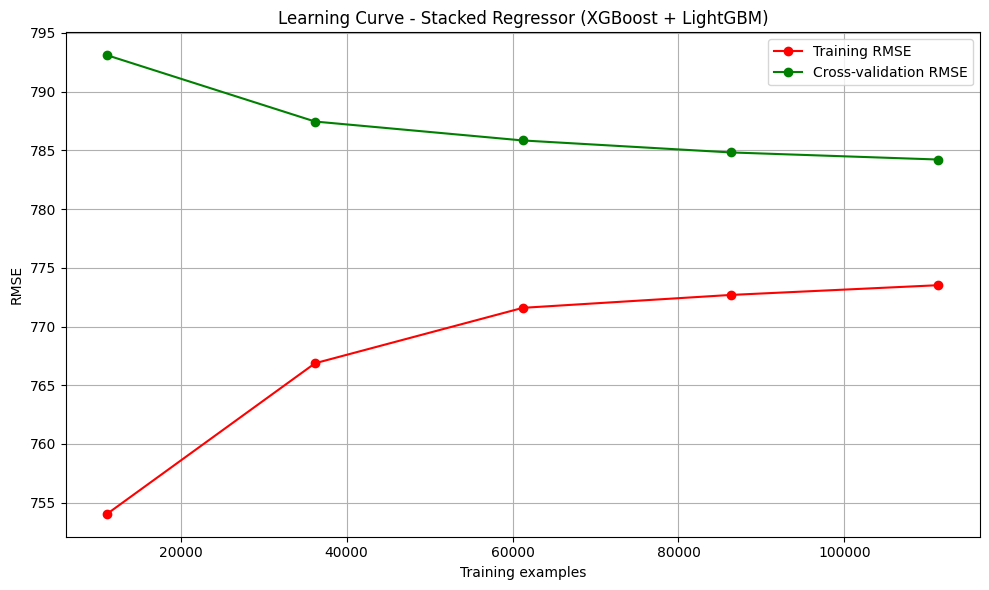

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    stacked_model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

# Convert RMSE back to +ve
train_rmse = -train_scores.mean(axis=1)
val_rmse = -val_scores.mean(axis=1)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-r', label='Training RMSE')
plt.plot(train_sizes, val_rmse, 'o-g', label='Cross-validation RMSE')
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.title("Learning Curve - Stacked Regressor (XGBoost + LightGBM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the above graph, we ca notice that stacking does not improve performance by any significant metric. 


Overall, our final conclusions are as follows:

1. _Tree based models outperformed simpler models_: With a score of ~762, LightGBM was the best performing model

2. _Learning Curves suggest slight underfitting_: The models generalized the data well, but were affected by slight underfitting. This may be corrected with more complex models or more engineered features

3. _Stacking didn't massively improve performance_: The stacked model (XGBoost + LightGBM) achieved comparable performance, but its scores were beaten out by the individual models 

4. _Bagging was helpful but not superior_: It improved variance control, but didn't outperform the individual models. 

5. _Grid Search CV (Hyperparameter Tuning)_: For the best performing models did not massively affect the RMSE Scores.